# Lab 10 : Task 1

#### Applying CNN on fruits dataset 
dataset:(https://www.kaggle.com/moltean/fruits)

In [1]:
import shutil,os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

In [2]:
my_data_dir = '../input/fruits/fruits-360'
os.listdir(my_data_dir)

['Training', 'LICENSE', 'test-multiple_fruits', 'papers', 'readme.md', 'Test']

In [3]:
train_path = my_data_dir+'/Training/'
test_path = my_data_dir+'/Test/'

In [4]:
classes = os.listdir(train_path)
print(classes)

['Nectarine Flat', 'Peach 2', 'Nut Pecan', 'Pear Williams', 'Pomegranate', 'Granadilla', 'Tangelo', 'Pear Red', 'Apple Golden 3', 'Cherry Wax Black', 'Papaya', 'Apple Red 3', 'Apple Pink Lady', 'Pepper Yellow', 'Cactus fruit', 'Corn Husk', 'Grapefruit White', 'Beetroot', 'Pear Abate', 'Raspberry', 'Dates', 'Avocado', 'Strawberry', 'Cherry 1', 'Pear', 'Rambutan', 'Pear Forelle', 'Avocado ripe', 'Plum 3', 'Tomato not Ripened', 'Tomato 3', 'Cherry 2', 'Peach', 'Tamarillo', 'Huckleberry', 'Pepino', 'Pitahaya Red', 'Carambula', 'Apple Red Delicious', 'Apple Braeburn', 'Onion Red', 'Mangostan', 'Grapefruit Pink', 'Cherry Wax Red', 'Blueberry', 'Passion Fruit', 'Corn', 'Redcurrant', 'Cantaloupe 1', 'Peach Flat', 'Pepper Orange', 'Grape White', 'Quince', 'Pineapple Mini', 'Kumquats', 'Pear Kaiser', 'Apple Golden 1', 'Apricot', 'Pepper Red', 'Walnut', 'Maracuja', 'Salak', 'Kiwi', 'Cucumber Ripe 2', 'Watermelon', 'Mango', 'Apple Crimson Snow', 'Cherry Wax Yellow', 'Clementine', 'Apple Red 1', 'A

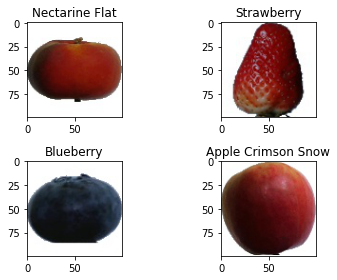

Image shape:(100, 100, 3)


In [5]:
file_name = '0_100.jpg'
width=8
height=8
rows = 2
cols = 2
axes=[]
fig=plt.figure()
i=0
for a in range(rows*cols):
    img = imread(train_path+classes[i]+'/'+file_name)
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=classes[i]
    axes[-1].set_title(subplot_title)  
    plt.imshow(img)
    i=i+22
fig.tight_layout()    
plt.show()
img_shape=img.shape
print("Image shape:"+str(img_shape))

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# help(ImageDataGenerator)

In [7]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [8]:
batch_size=512

In [9]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=img_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 67692 images belonging to 131 classes.


In [10]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=img_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical',shuffle=False)

Found 22688 images belonging to 131 classes.


In [11]:
import tensorflow as tf

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense,Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
# help(MaxPooling2D)

In [17]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5,5),input_shape=img_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))

model.add(Conv2D(filters=32, kernel_size=(5,5),input_shape=img_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))

model.add(Conv2D(filters=64, kernel_size=(5,5),input_shape=img_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))


model.add(Flatten())


model.add(Dense(1024))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

model.add(Dense(131))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [18]:
early_stop = EarlyStopping(monitor='val_loss',verbose=1, patience=2)

In [19]:
#Ignore warnings
with tf.device('/GPU:0'):
    results = model.fit(train_image_gen,validation_data=test_image_gen,callbacks=[early_stop],epochs=12
                   )

Epoch 1/12
133/133 [==============================] - 430s 3s/step - loss: 1.9765 - accuracy: 0.4752 - val_loss: 0.6007 - val_accuracy: 0.8268
Epoch 2/12
133/133 [==============================] - 300s 2s/step - loss: 0.3648 - accuracy: 0.8796 - val_loss: 0.3599 - val_accuracy: 0.9030
Epoch 3/12
133/133 [==============================] - 297s 2s/step - loss: 0.2040 - accuracy: 0.9312 - val_loss: 0.4718 - val_accuracy: 0.8784
Epoch 4/12
133/133 [==============================] - 295s 2s/step - loss: 0.1291 - accuracy: 0.9561 - val_loss: 0.2103 - val_accuracy: 0.9489
Epoch 5/12
133/133 [==============================] - 298s 2s/step - loss: 0.1015 - accuracy: 0.9657 - val_loss: 0.1785 - val_accuracy: 0.9575
Epoch 6/12
133/133 [==============================] - 301s 2s/step - loss: 0.0766 - accuracy: 0.9747 - val_loss: 0.2032 - val_accuracy: 0.9530
Epoch 7/12
133/133 [==============================] - 297s 2s/step - loss: 0.0631 - accuracy: 0.9784 - val_loss: 0.1786 - val_accuracy: 0.9609

In [20]:
losses = pd.DataFrame(model.history.history)

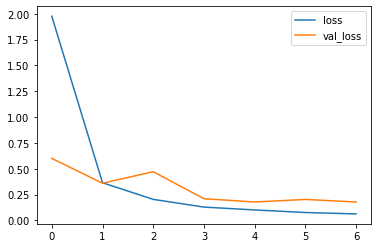

In [21]:
losses[['loss','val_loss']].plot()

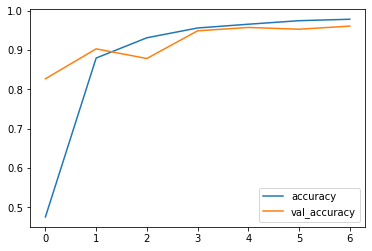

In [22]:
losses[['accuracy','val_accuracy']].plot()

In [23]:
model.evaluate_generator(test_image_gen)
#[loss,accuracy]

[0.17831288278102875, 0.9603755474090576]

In [24]:
model.save('Fruits_Classifier_v1.h5')